In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import numpy as np

In [2]:
# Константы
pi   = 3.1415    # число пи
g    = 9.807     # ускорение свободного падения на Земле, м/c^2
rho   = 1.2754    # плотность воздуха, кг/м^3

c       = 0.045  # коэффициент лобового сопротивления (в данном случае для полусферы)
v_sound = 335    # скорость звука в воздухе, м/c

In [3]:
# Исходные данные
m0      = 600000  # начальная общая масса, кг
m_fuel  = -1      # начальная масса топлива, кг
m_cons  = 10000   # конструкционная масса, кг
# одна из этих переменных может быть не дана (в таком случае ее значение - -1), других двух достаточно для её расчета
# если одна из этих переменных имеет значение -1, программа автоматически рассчитает её значение

diam    = 1.5       # диаметр ракеты, м
s_cross = -1      # площадь поперечного сечения, м
# если дан только диаметр ракеты, то в значение s_cross записывается -1 и далее s считается автоматически

alpha   = 20000    # расход топлива, кг/c
u       = 600     # скорость истечения газов, м/c

In [4]:
# Проверка корректности исходных данных
if m0 == -1 and m_fuel == -1 or m0 == -1 and m_cons == -1 or m_fuel == -1 and m_cons == -1:
    raise ValueError("Данных о массе недостаточно")
if diam == -1 and s_cross == -1:
    raise ValueError("Недосаточно данных для расчета площади поперечного сечения")
if m0 != -1 and m0 <= 0:
    raise ValueError("Некорректная общая начальная масса")
if m_fuel != -1 and m_fuel <= 0:
    raise ValueError("Некорректная начальная масса топлива")
if m_cons != -1 and m_cons <= 0:
    raise ValueError("Некорректная конструкционная масса")
if diam != -1 and diam <= 0:
    raise ValueError("Некорректный диаметр ракеты")
if s_cross != -1 and s_cross <= 0:
    raise ValueError("Некорректная площадь поперечного сечения")
if u <= 0 or u > 6666:
    raise ValueError("Некорректная скорость истечения газов")

In [5]:
# Расчет недостающих исходных данных
if m0 == -1:
    m0 = m_fuel + m_cons
if m_fuel == -1:
    m_fuel = m0 - m_cons
if m_cons == -1:
    m_cons = m0 - m_fuel
if s_cross == -1:
    s_cross = diam * pi

In [6]:
# Вертикальный взлет
def m(t):
    global alpha
    global m0
    global m_cons
    if m0 - alpha * t > m_cons:
        return m0 - alpha * t
    return m_cons
def f_vertical(t, v):
    global alpha
    global u
    global c
    global s_cross
    global rho
    global g
    return (alpha * u - 0.5 * c * s_cross * rho * v**2) / m(t) - g
t = 0
v0 = 0
h0 = 0
while v0 < v_sound:
    t += 0.1
    if m0 - alpha * t < m_cons:
        print("Недостаточно топлива")
        raise SystemExit
    v0 += 0.1 * f_vertical(t - 0.1, v0)
    h0 = f_vertical(t, v0) * t**2 / 2 
t1 = t

In [7]:
# Горизонтальное движение
def f_horizontal_y(t, v):
    global alpha
    global u
    global c
    global s_cross
    global rho
    global g
    return g - (alpha * u - 0.5 * c * s_cross * rho * v**2) / m(t + t1)
def f_horizontal_x(t, v):
    global alpha
    global u
    global c
    global s_cross
    global rho
    global g
    return (alpha * u - 0.5 * c * s_cross * rho * v**2) / m(t + t1)
t = 0
vy = 0
vx = v0
h = h0
l = 0
x_dots = [0, 0]
y_dots = [0, h0]
while h > 0:
    t += 0.1
    vy += 0.1 * f_horizontal_y(t - 0.1, vy)
    h = h0 - (g - f_horizontal_y(t, vy)) * t**2 / 2
    vx += 0.1 * f_horizontal_x(t - 0.1, vx)
    l = f_horizontal_x(t, vx) * t**2 / 2
    x_dots.append(l)
    y_dots.append(h)

Скорость звука достигается за 17 секунд на высоте 5358 метров.
Длительность всего полёта - 26 секунд, горизонтальное расстояние, пройденное ракетой - 5345 метров.
Траектория полёта:


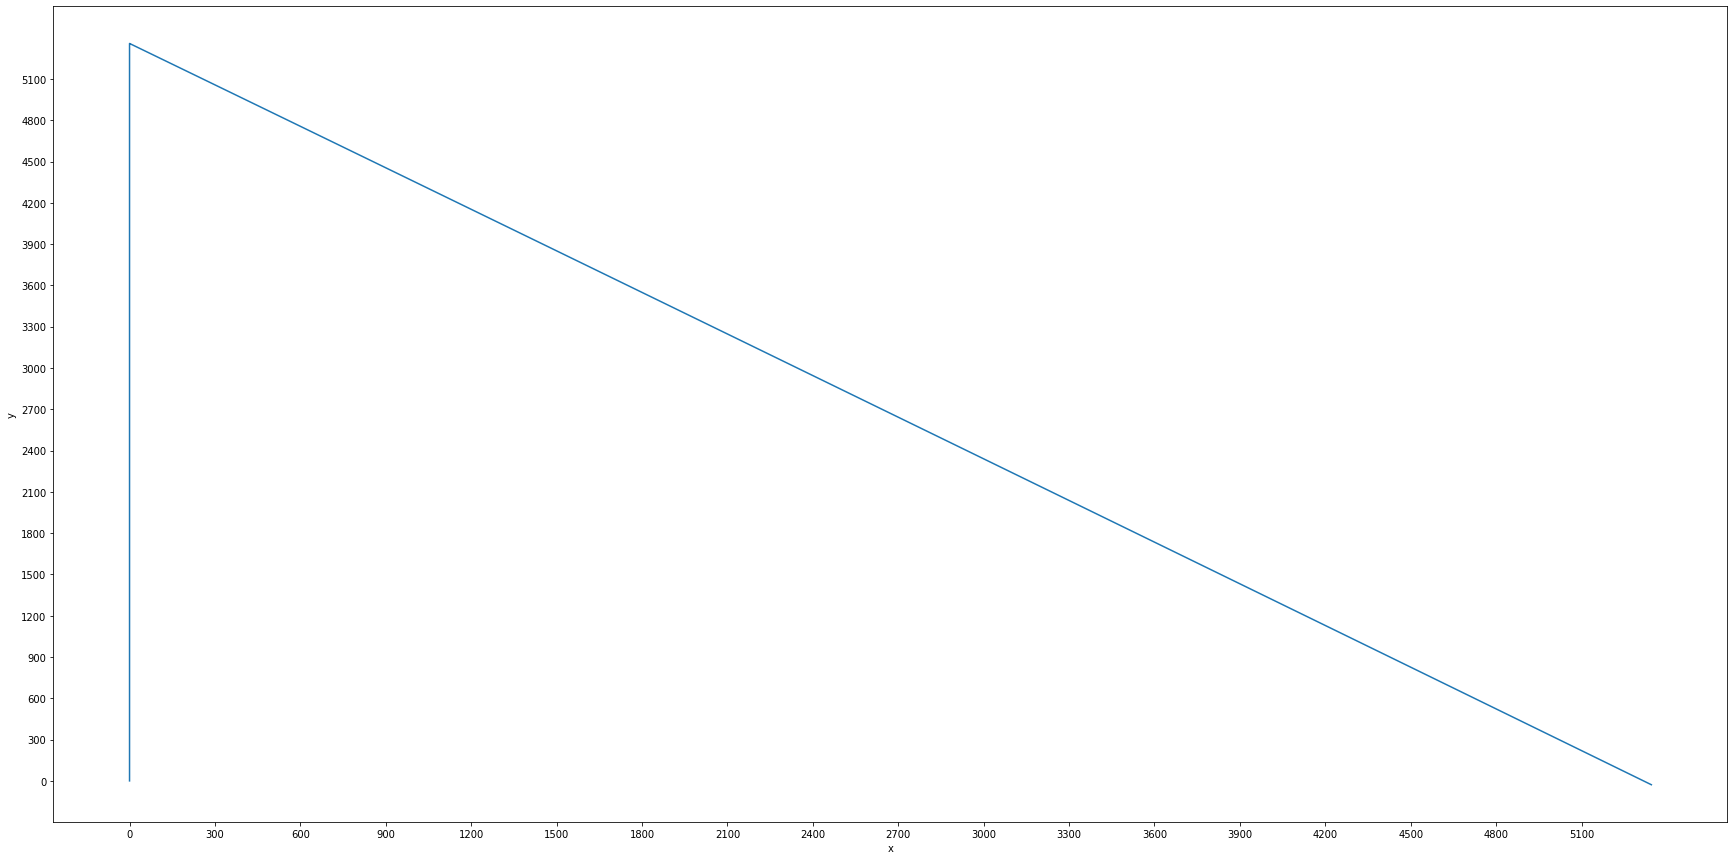

In [14]:
# Вывод результатов
print("Скорость звука достигается за", round(t1), "секунд на высоте", round(h0), "метров.")
print("Длительность всего полёта -", round(t + t1), "секунд, горизонтальное расстояние, пройденное ракетой -", round(l), "метров.")
print("Траектория полёта:")
plt.plot(x_dots, y_dots)
plt.xlabel("x")
plt.ylabel("y")
plt.rcParams['figure.figsize'] = [30, 15]
plt.xticks(np.arange(min(x_dots), max(x_dots)+1, 300.0))
plt.yticks(np.arange(0, max(y_dots)+1, 300.0))
plt.show()